# Tarea 3:

## Regresión Lineal

Realizar Regresión Lineal sobre los datos del archivo `auto-mpg.csv`, que se encuentra en el directorio de datos del repositorio. La variable objetivo es `mpg`.

Se pide hacer lo siguiente:
- Análisis de los datos
- Ingeniería de atributos
- Dividir el conjunto de datos en uno de entrenamiento y uno de prueba
- Entrenar el modelo de regresión lineal
- Evaluar el modelo

Fecha de entrega: martes 9 de Julio (antes de la hora de clase)

In [237]:
## Impotar archivos
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import seaborn as sns

In [238]:
data = pd.read_csv('../../datos/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [240]:
data.shape

(398, 9)

In [241]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


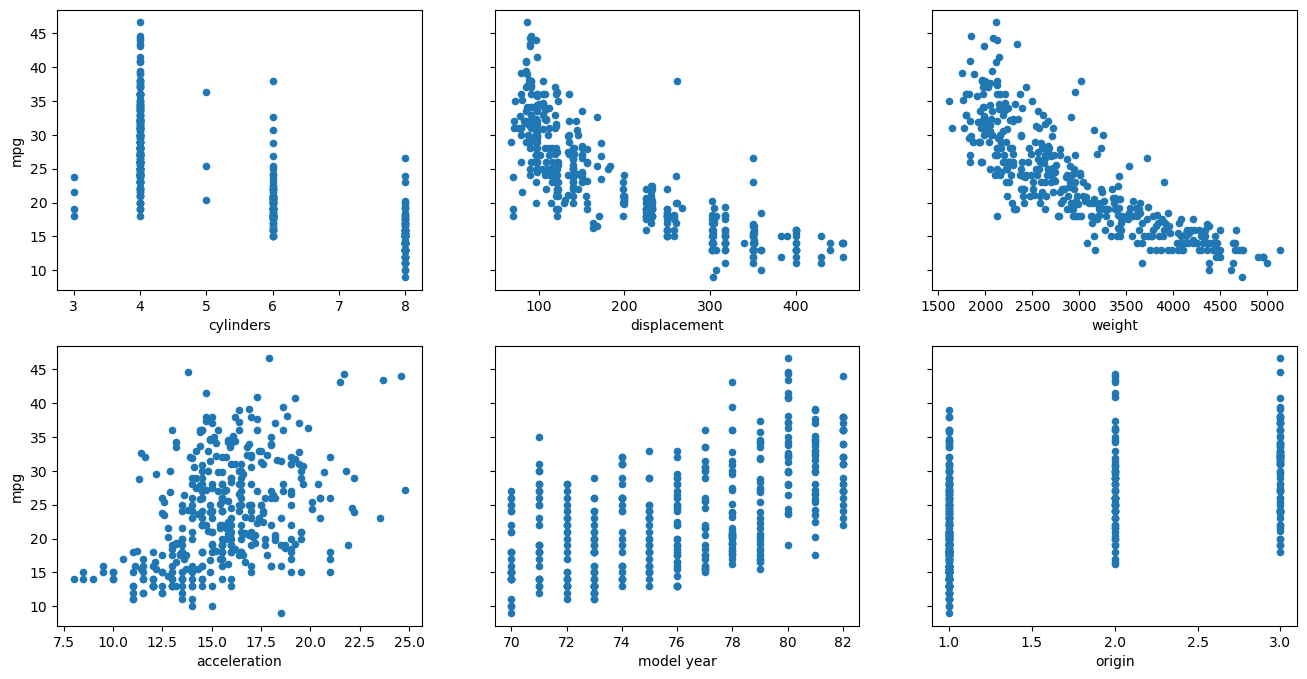

In [242]:
fig, axs = plt.subplots(2, 3, sharey=True)
data.plot(kind='scatter', x='cylinders', y='mpg', ax=axs[0][0], figsize=(16, 8))
data.plot(kind='scatter', x='displacement', y='mpg', ax=axs[0][1])
data.plot(kind='scatter', x='weight', y='mpg', ax=axs[0][2])
data.plot(kind='scatter', x='acceleration', y='mpg', ax=axs[1][0])
data.plot(kind='scatter', x='model year', y='mpg', ax=axs[1][1])
data.plot(kind='scatter', x='origin', y='mpg', ax=axs[1][2]);

In [243]:
from sklearn.model_selection import train_test_split
# atributos ['cylinders', 'acceleration', 'weight', 'displacement', 'weight', 'model year', 'origin']
atributos_cols = ['cylinders', 'acceleration', 'displacement', 'weight', 'model year','origin']
x = data[atributos_cols]
y = data.mpg
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(
    x, y, test_size=0.25, random_state=18)


In [244]:
print("Forma de X_entrenamiento: {}".format(x_entrenamiento.shape))
print("Forma de y_entrenamiento: {}".format(y_entrenamiento.shape))

Forma de X_entrenamiento: (298, 6)
Forma de y_entrenamiento: (298,)


In [245]:
print("Forma de X_prueba: {}".format(x_prueba.shape))
print("Forma de y_prueba: {}".format(y_prueba.shape))

Forma de X_prueba: (100, 6)
Forma de y_prueba: (100,)


In [246]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_entrenamiento, y_entrenamiento)

print (lm.intercept_)
print (lm.coef_)

-22.18210137279935
[-0.17864429  0.19155615  0.01402795 -0.00692309  0.78053859  1.3258327 ]


In [247]:
lm.score(x_prueba, y_prueba)

0.8517131289561248

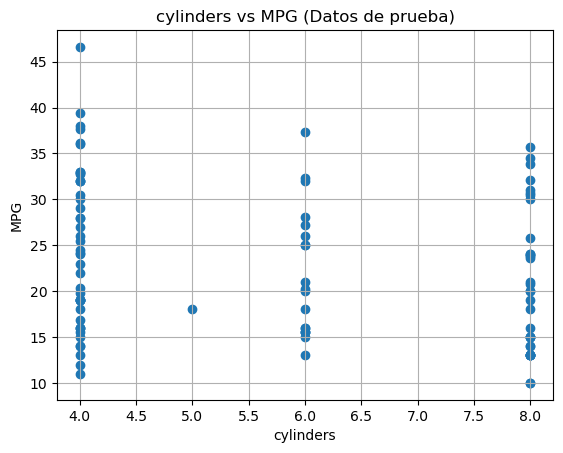

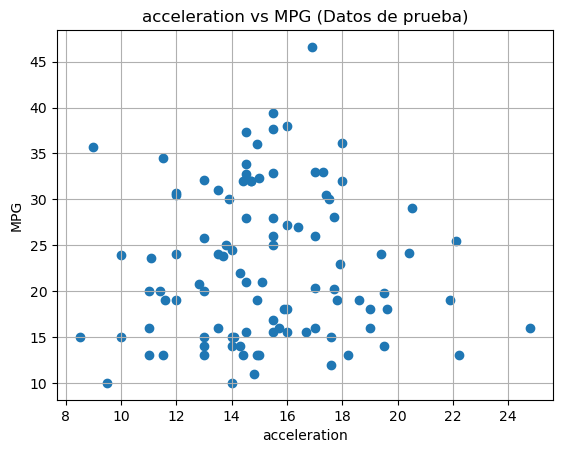

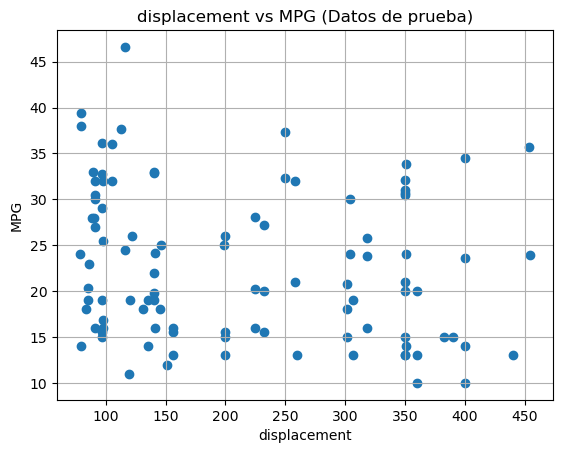

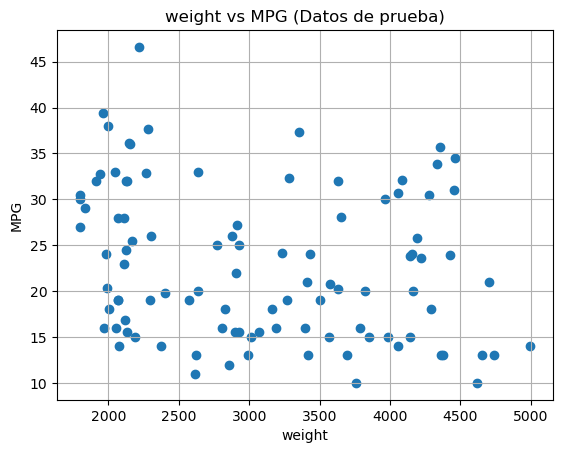

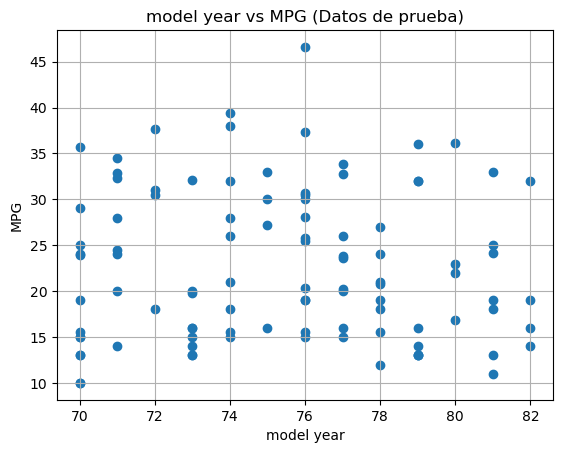

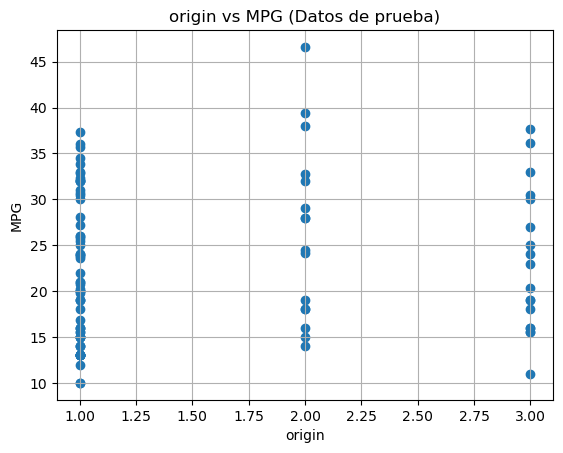

In [259]:
x_prueba_ordenado = x_prueba.sort_values(by=['cylinders', 'acceleration', 'displacement', 'weight', 'model year', 'origin'], ascending=True)
columnas = x_prueba_ordenado.columns  # Obtener las columnas de x_prueba

for columna in columnas:
    plt.figure()  # Crear una nueva figura para cada gráfico
    plt.scatter(x_prueba_ordenado[columna], y_prueba)
    plt.xlabel(columna)  # Etiqueta para el eje X (nombre de la columna actual)
    plt.ylabel('MPG')  # Etiqueta para el eje Y
    plt.title(f'{columna} vs MPG (Datos de prueba)')  # Título del gráfico
    plt.grid(True)

    # Opcional: Agregar línea de regresión
    # ... (código para ajustar y agregar la línea de regresión)

    plt.show() 